In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./main_parser2.csv')
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
def concat_dummies(df, dummies):
    for dummy in list(dummies):
        df[dummy] = dummies[dummy]
    return list(dummies)

In [4]:
def create_dummies(df, column, prefix):
    dummies = pd.get_dummies(df[column], prefix=prefix)
    return concat_dummies(df, dummies)

In [5]:
c_first_pos = create_dummies(df, 'correct_trigram_tag_0', 'correct_trigram_tag_0')
c_second_pos = create_dummies(df, 'correct_trigram_tag_1', 'correct_trigram_tag_1')
c_third_pos = create_dummies(df, 'correct_trigram_tag_2', 'correct_trigram_tag_2')
i_first_pos = create_dummies(df, 'incorrect_trigram_tag_0', 'incorrect_trigram_tag_0')
i_second_pos = create_dummies(df, 'incorrect_trigram_tag_1', 'incorrect_trigram_tag_1')
i_third_pos = create_dummies(df, 'incorrect_trigram_tag_2', 'incorrect_trigram_tag_2')
c_first_dep = create_dummies(df, 'correct_trigram_dep_0', 'correct_trigram_dep_0')
c_second_dep = create_dummies(df, 'correct_trigram_dep_1', 'correct_trigram_dep_1')
c_third_dep = create_dummies(df, 'correct_trigram_dep_2', 'correct_trigram_dep_2')
i_first_dep = create_dummies(df, 'incorrect_trigram_dep_0', 'incorrect_trigram_dep_0')
i_second_dep = create_dummies(df, 'incorrect_trigram_dep_1', 'incorrect_trigram_dep_1')
i_third_dep = create_dummies(df, 'incorrect_trigram_dep_2', 'incorrect_trigram_dep_2')

error_types = create_dummies(df, 'error_type', 'error_type')

In [6]:
grouped_df = df.groupby(['student_id', 'language'])[list(i_first_pos) + list(i_second_pos)
        + list(i_third_pos) + list(c_first_pos) + list(c_second_pos) 
        + list(c_third_pos) + list(i_first_dep) + list(i_second_dep) 
        + list(i_third_dep) + list(c_first_dep) + list(c_second_dep) 
        + list(c_third_dep) + list(error_types)].sum().reset_index()

In [18]:
grouped_df = grouped_df[grouped_df.language.isin(['French', 'Thai'])]
grouped_df

,student_id,language,incorrect_trigram_tag_0_$,incorrect_trigram_tag_0_'',"incorrect_trigram_tag_0_,",incorrect_trigram_tag_0_-LRB-,incorrect_trigram_tag_0_-RRB-,incorrect_trigram_tag_0_.,incorrect_trigram_tag_0_:,incorrect_trigram_tag_0_ADD,...,error_type_UD,error_type_UJ,error_type_UN,error_type_UP,error_type_UQ,error_type_UT,error_type_UV,error_type_UY,error_type_W,error_type_X
6,TE1*0100*2001*01,French,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,TE15*0100*2001*01,Thai,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,0,0
14,TE17*0100*2001*01,French,0,0,0,0,0,0,0,0,...,2,0,0,1,0,1,0,0,0,0
18,TE20*0100*2001*01,Thai,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
20,TE22*0100*2001*01,Thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,TR993*0102*2000*01,French,0,0,1,0,0,0,0,0,...,2,1,1,1,0,1,2,0,0,0
1238,TR994*0100*2000*01,French,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,1,1,0
1240,TR996*0102*2000*01,Thai,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,2,1,2,1
1242,TR998*0100*2000*01,French,0,0,0,0,1,1,0,0,...,1,0,1,1,1,2,0,0,1,0


In [19]:
features = (list(error_types))
x = grouped_df.loc[:, features].values
y = grouped_df.loc[:,['language']].values

In [20]:
x = StandardScaler().fit_transform(x)

In [21]:
pd.DataFrame(data = x, columns = features).head()

,error_type_AG,error_type_AGA,error_type_AGD,error_type_AGN,error_type_AGQ,error_type_AGV,error_type_AS,error_type_CD,error_type_CL,error_type_CN,...,error_type_UD,error_type_UJ,error_type_UN,error_type_UP,error_type_UQ,error_type_UT,error_type_UV,error_type_UY,error_type_W,error_type_X
0,-0.069338,-0.4119,-0.291162,0.082086,-0.156556,-0.872258,-0.341058,0.0,-0.186154,-0.457128,...,-0.807413,-0.278064,-0.363402,-0.364405,-0.224168,-0.817145,-0.581807,-0.526895,-0.79597,-0.351647
1,-0.069338,-0.4119,-0.291162,0.082086,-0.156556,0.855723,-0.341058,0.0,-0.186154,0.947868,...,-0.095391,3.596294,2.010066,-0.364405,-0.224168,-0.817145,0.622130,-0.526895,-0.79597,-0.351647
2,-0.069338,-0.4119,-0.291162,3.201359,-0.156556,-0.872258,-0.341058,0.0,5.371884,-0.457128,...,0.616632,-0.278064,-0.363402,1.448945,-0.224168,0.106008,-0.581807,-0.526895,-0.79597,-0.351647
3,-0.069338,-0.4119,-0.291162,-0.697732,-0.156556,0.855723,-0.341058,0.0,-0.186154,0.947868,...,0.616632,-0.278064,-0.363402,-0.364405,-0.224168,-0.817145,-0.581807,-0.526895,-0.79597,-0.351647
4,-0.069338,-0.4119,-0.291162,0.861904,-0.156556,0.855723,-0.341058,0.0,-0.186154,-0.457128,...,-0.807413,-0.278064,-0.363402,-0.364405,-0.224168,0.106008,-0.581807,-0.526895,-0.79597,2.843757


In [22]:
pca = PCA(n_components=2)

In [23]:
principalComponents = pca.fit_transform(x)

In [24]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [25]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.117977,0.370016
1,-0.244685,0.254556
2,2.880969,1.109115
3,-1.508188,1.271977
4,0.545227,2.864629


In [26]:
grouped_df[['language']].head()

,language
6,French
12,Thai
14,French
18,Thai
20,Thai


In [27]:
finalDf = pd.concat([principalDf, grouped_df[['language']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,language
0,-2.117977,0.370016,NaN
1,-0.244685,0.254556,NaN
2,2.880969,1.109115,NaN
3,-1.508188,1.271977,NaN
4,0.545227,2.864629,NaN


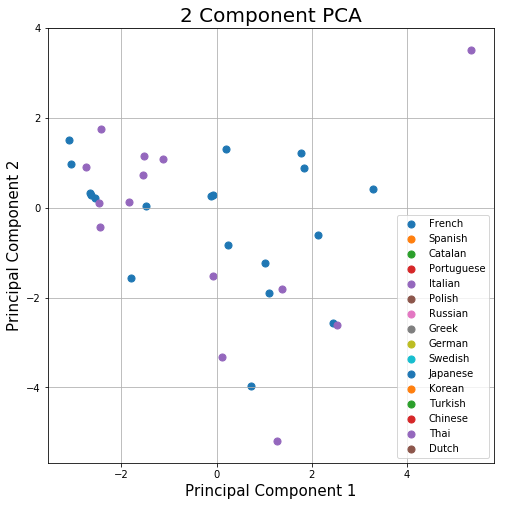

In [29]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['French', 'Spanish', 'Catalan', 'Portuguese', 'Italian', 'Polish', 'Russian', 'Greek','German',
           'Swedish', 'Japanese', 'Korean', 'Turkish', 'Chinese', 'Thai', 'Dutch']
colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['language'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)
ax.legend(targets)
ax.grid()